# Python и статистика

Проект №4 - сравнение средних значений (t-тест).

# Введение

## Общая постановка задачи

Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

## Описание данных

- ```order_id``` - id заказа
- ```delivery_time``` - время доставки в минутах
- ```district``` - район доставки
- ```experiment_group``` - экспериментальная группа

# Предварительная работа с данными

## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np, scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

In [2]:
df = pd.read_csv('./data/delivery_experiment.csv')

In [3]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


## Предобработка данных

### Проверка на дубликаты и отсутствующие значения:

In [4]:
from spelling import rows_word, cols_word
    
a0 = df.shape[0]
a1 = df.shape[1]
a2 = df.dropna().shape[0]
a3 = df.drop_duplicates().shape[0]

print(a0, rows_word(a0), "и", a1, cols_word(a1))
print(a2, rows_word(a2), "после удаления строк, содержащих NULL")
print(a3, rows_word(a3), "после удаления дубликатов")

20196 строк и 4 колонки
20196 строк после удаления строк, содержащих NULL
20196 строк после удаления дубликатов


### Проверка типов данных

In [5]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

# Решение поставленных задач

### Гипотезы для проверки

**Нулевая гипотеза (H0):** Разницы между средним временем доставки в тестовой и контрольной группе нет

**Альтернативная гипотеза (H1):** Разница между средним временем доставки в тестовой и контрольной группе есть

Построим графики распределения времени доставки для двух групп:

<AxesSubplot:xlabel='delivery_time', ylabel='Count'>

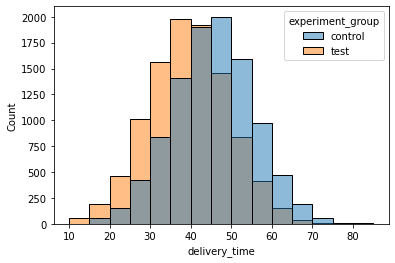

In [6]:
sns.histplot(df, x = 'delivery_time', hue = 'experiment_group', binwidth = 5)

Подсчитаем количество наблюдений в тестовой и контрольной группе:

In [7]:
df.query("experiment_group == 'control'")['order_id'].nunique()

10092

In [8]:
df.query("experiment_group == 'test'")['order_id'].nunique()

10104

Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тестовой и контрольной группах.

Считаем стандартное отклонение для обоих групп:

In [9]:
control_group = df.query("experiment_group == 'control'")['delivery_time']
test_group = df.query("experiment_group == 'test'")['delivery_time']

In [10]:
round(np.std(control_group), 2)

9.99

In [11]:
round(np.std(test_group), 2)

9.88

Делаем семплирование:

In [12]:
control_sample = control_group.sample(1000, random_state = 17)
test_sample = test_group.sample(1000, random_state = 17)

In [13]:
st.shapiro(control_sample)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [14]:
st.shapiro(test_sample)

ShapiroResult(statistic=0.9975475668907166, pvalue=0.14005419611930847)

### Сравнение средних для двух групп

In [15]:
st.ttest_ind(control_group, test_group)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

In [16]:
x_avg_control = control_group.describe()['mean']
round(x_avg_control, 1)

45.1

In [17]:
x_avg_test = test_group.describe()['mean']
round(x_avg_test, 1)

39.0

На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной:

In [18]:
round(100 * (x_avg_test / x_avg_control - 1), 2)

-13.35